In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pylab as pl

In [9]:
# Choose datasets using 

(train,label_train), (test, label_test) = tf.keras.datasets.mnist.load_data() #Labeled digits
(train,label_train), (test, label_test) = tf.keras.datasets.fashion_mnist.load_data() #Labeled clothe

print (train.shape, test.shape, label_train.shape, label_test.shape)
print (train.dtype) #To see the data type

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))
uint8


In [10]:
#Recastging the dataset type to float32

test = test.astype(np.float32)
train = train.astype(np.float32)

In [35]:
#Slicing the data sets to make it smalletr

num_test, num_train=10000,10000

test, label_test= test[:num_test], label_test[:num_test]
train, label_train= train[:num_test], label_train[:num_test]

print (train.shape, test.shape, label_train.shape, label_test.shape)

((1000, 28, 28), (1000, 28, 28), (1000,), (1000,))


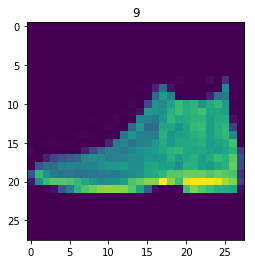

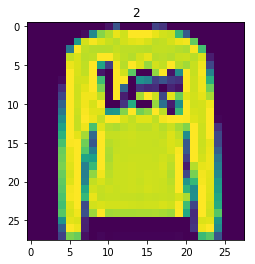

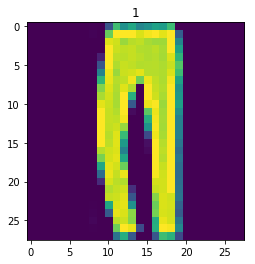

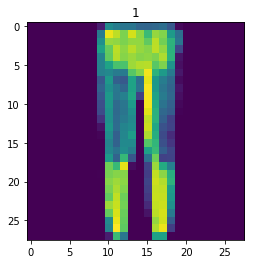

In [16]:
#Lets have a look of the data first

num_examples = 4
for label, image in zip(label_test, test)[:num_examples]: #To create pairs image-label
    pl.imshow(image)
    pl.title(label)
    pl.show()
    
    

In [22]:
import tqdm #Gives a nice counting bar
import time 

for index in tqdm.tqdm(range(10)):
    time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


In [24]:
#Start predicting labels 
#This cell is really ineficient, because of the 2 nested loops.

def predict(image, train, label_train):
    bsf=float('infinity') #Best so far distance, initialised
    bsf_index=-1
    
    for index, train_image in enumerate(train):
        #Train and test are 28x28 matrices
        dist = np.sum(np.square(train_image-image),axis=(0,1)) # Euclidian distance, if datasets are aligned
        
        if dist < bsf:
            bsf=dist
            bsf_index=index
            
    return label_train[bsf_index]

begin =time.time()

label_predicted =np.zeros(label_test.shape)
for index, image in  tqdm.tqdm(enumerate(test)):
    label_predicted[index]=predict(image, train, label_train)
    
    
print (np.mean(label_predicted==label_test), time.time()-begin)


1000it [00:08, 111.92it/s]

(0.769, 8.950224161148071)


In [39]:
#Last cell is really ineficient, because of the 2 nested loops. We do this is numpy which is implemented in c

begin =time.time()

# [num_test,28,28]
X2 = np.sum(np.square(test),axis= (1,2)) #Shape is [image, pixel x, pixel y]
Y2 = np.sum(np.square(train),axis= (1,2))
XY = np.tensordot(train, test, axes =((1,2),(1,2)))


print (XY.shape, X2.shape, Y2.shape) 

#Like reshaping
X2 = np.expand_dims(X2,1)
Y2 = np.expand_dims(Y2,1)

print (XY.shape, X2.shape, Y2.shape) 

#The euclidian distance

D=X2-2*XY+Y2

best_match=D.argmin(axis=1)

#print (best_match)
label_predict = label_train[best_match]

print (np.mean(label_predict == label_test), time.time()-begin)


((1000, 1000), (1000,), (1000,))
((1000, 1000), (1000, 1), (1000, 1))
(0.098, 0.01783013343811035)
